In [1]:
#import biom
import numpy as np

import os
import OSEA

import pandas as pd

In [2]:
#cwd = os.getcwd()
metadata_filename = os.path.join('', 'upload_files/demo/demo_metadata.tsv')
with open(metadata_filename) as metadata_file:
    metadata = pd.read_csv(metadata_file, sep='\t') 

In [3]:
import biom

In [4]:
feature_table = os.path.join('','upload_files/feature-table.biom')
#with open(feature_table_filename) as feature_table_file:
table  = biom.load_table(feature_table).to_dataframe().transpose()
    #feature_table = 

In [5]:
taxonomy_filename = os.path.join('','upload_files/taxonomy.tsv')

In [6]:
import time

In [7]:
rank_list = OSEA.permutation_to_obtain_ranklist(feature_table)
osea = OSEA.OSEA(rank_list, Taxon_file=taxonomy_filename)

In [8]:
print(len(osea.set_es))
for ele in osea.set_es:
    print(len(osea.set_es[ele]))


19
760
760
760
760
760
760
760
760
760
760
760
760
760
760
760
760
760
760
760


In [9]:
import matplotlib.pyplot as plt

In [10]:
tmp = 0
i = 1

for ele in osea.set_es:
    tmp = osea.set_es[ele]
    plt.subplot(4,5,i)
    plt.plot(tmp)
    i+=1

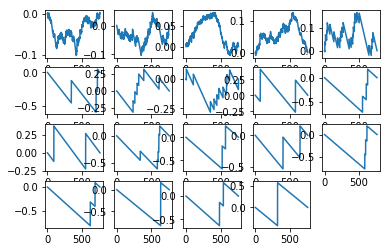

In [11]:

plt.show()

In [12]:
osea.set_hit_count

{' p__Proteobacteria': 165,
 ' p__Actinobacteria': 66,
 ' p__Firmicutes': 297,
 ' p__Bacteroidetes': 140,
 ' p__Fusobacteria': 23,
 ' p__Tenericutes': 3,
 ' p__Spirochaetes': 6,
 ' p__Cyanobacteria': 11,
 ' p__[Thermi]': 2,
 ' p__Planctomycetes': 3,
 ' p__SR1': 2,
 ' p__Verrucomicrobia': 6,
 ' p__Crenarchaeota': 2,
 ' p__Synergistetes': 2,
 ' p__Chloroflexi': 3,
 ' p__GN02': 2,
 ' p__TM7': 1,
 ' p__Acidobacteria': 2,
 ' p__FBP': 1}

In [13]:
a=[np.random.randint(100) for i in range(100)]

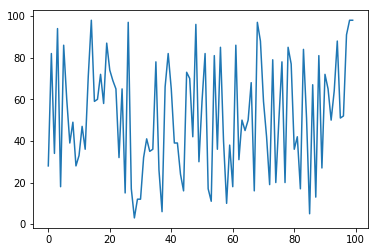

In [14]:
plt.plot(a)
plt.show()

In [15]:
enrichment_scores = []
tic = time.time()
for i in range(100):
    print('#######____'+str(i)+'___####')
    rank_list = OSEA.permutation_to_obtain_ranklist(feature_table)
    osea = OSEA.OSEA(rank_list, Taxon_file=taxonomy_filename,set_level='Genus')
    enrichment_scores.append(osea.es)
    #osea.es
new_tic = time.time()

#######____0___####
#######____1___####
#######____2___####
#######____3___####
#######____4___####
#######____5___####
#######____6___####
#######____7___####
#######____8___####
#######____9___####
#######____10___####
#######____11___####
#######____12___####
#######____13___####
#######____14___####
#######____15___####
#######____16___####
#######____17___####
#######____18___####
#######____19___####
#######____20___####
#######____21___####
#######____22___####
#######____23___####
#######____24___####
#######____25___####
#######____26___####
#######____27___####
#######____28___####
#######____29___####
#######____30___####
#######____31___####
#######____32___####
#######____33___####
#######____34___####
#######____35___####
#######____36___####
#######____37___####
#######____38___####
#######____39___####
#######____40___####
#######____41___####
#######____42___####
#######____43___####
#######____44___####
#######____45___####
#######____46___####
#######____47___####
##

In [37]:
len(enrichment_scores)

100

In [16]:
print('the time used is %.5f seconds'%(new_tic-tic))

the time used is 11651.87437 seconds


In [17]:
#for i in range(100):
set_enrichment_score = {}
for key in enrichment_scores[0]:
    set_enrichment_score[key] = []
    for i in range(100):
        set_enrichment_score[key].append(enrichment_scores[i][key])


In [18]:
i = 1
for ele in set_enrichment_score:
    plt.subplot(5,4,i)
    plt.hist(set_enrichment_score[ele],bins=25)
    i += 1
plt.show()

ValueError: num must be 1 <= num <= 20, not 21

In [19]:
import heatmap

In [20]:
#heatmap_instance.df.columns

In [21]:

heatmap_instance = heatmap.Heatmap(metadata_filename,feature_table)
heatmap_instance.map()


Index(['L1S105', 'L1S140', 'L1S208', 'L1S257', 'L1S281', 'L1S57', 'L1S76',
       'L1S8', 'L2S155', 'L2S175', 'L2S204', 'L2S222', 'L2S240', 'L2S309',
       'L2S357', 'L2S382', 'L3S242', 'L3S294', 'L3S313', 'L3S341', 'L3S360',
       'L3S378', 'L4S112', 'L4S137', 'L4S63', 'L5S104', 'L5S155', 'L5S174',
       'L5S203', 'L5S222', 'L5S240', 'L6S20', 'L6S68', 'L6S93'],
      dtype='object')


In [22]:
import stats_test

In [23]:
part1, part2 = stats_test.choose_two_class(heatmap_instance.df,'Subject')
part1 = part1[heatmap_instance.df_primary_col]
part2 = part2[heatmap_instance.df_primary_col]

In [24]:
def obtain_rank_list(df1, df2, test_method_name='t_test'):
    methods = {'t_test': stats_test.t_test,
               'F_test': stats_test.F_test}
    test_method = methods[test_method_name]
    rank_list_unsort = {}
    for col in part1.columns:
        tmp_pvalue = test_method(part1[col],part2[col])
        rank_list_unsort[col]=tmp_pvalue
    tmp_list = sorted(rank_list_unsort, key=rank_list_unsort.get,reverse=True)
    rank_list = {}
    for ele in tmp_list:
        rank_list[ele]=rank_list_unsort[ele]
    return rank_list

In [25]:
rank_list = obtain_rank_list(part1,part2)

In [26]:
#rank_list

In [31]:
osea_real = OSEA.OSEA(rank_list,Taxon_file=taxonomy_filename,set_level='Genus')

In [32]:
final_result = {}
for ele in set_enrichment_score:
    distribution = OSEA.generate_distribution(set_enrichment_score[ele])
    pvalue = OSEA.p_value(osea_real.es[ele],distribution)
    final_result[ele]={'ES':osea_real.es[ele],'pvalue':pvalue}

In [40]:
i = 0
for ele in final_result:
    if final_result[ele]['pvalue'] < 0.05:
        print(ele,final_result[ele])
        i+=1
print(i)

 g__Prevotella {'ES': 0.10026385224274426, 'pvalue': 0.0}
 g__Neisseria {'ES': 0.30606860158311344, 'pvalue': 0.0}
 g__Subdoligranulum {'ES': 0.6490765171503958, 'pvalue': 0.0}
 g__Mycoplasma {'ES': 0.5017590149516271, 'pvalue': 0.0}
 g__Oribacterium {'ES': 0.01846965699208447, 'pvalue': 0.0}
 g__Paracoccus {'ES': 0.5461741424802111, 'pvalue': 0.0}
 g__Acanthamoeba {'ES': 0.4036939313984169, 'pvalue': 0.0}
 g__Coprococcus {'ES': 0.1299472295514512, 'pvalue': 0.0}
 g__Treponema {'ES': 0.21459982409850475, 'pvalue': 0.0}
 g__Faecalibacterium {'ES': 0.13324538258575197, 'pvalue': 0.0}
 g__Bacteroides {'ES': 0.2092828016310866, 'pvalue': 0.0}
 g__Rubricoccus {'ES': 0.39182058047493407, 'pvalue': 0.0}
 g__Hydrogenophaga {'ES': 0.5303430079155673, 'pvalue': 0.0}
 g__Anaerococcus {'ES': 0.2540520165849979, 'pvalue': 0.0}
 g__Oscillospira {'ES': 0.16325857519788917, 'pvalue': 0.0}
 g__Corynebacterium {'ES': 0.11134564643799472, 'pvalue': 0.0}
 g__Hymenobacter {'ES': 0.5211081794195251, 'pvalue

In [38]:
print(len(final_result))

178


In [ ]:
a=[1,2,3]
hist = np.histogram(a,bins=3)
len(hist[0])

In [ ]:
len(hist[1])

In [ ]:
genus_scores = []
tic = time.time()
for i in range(1):
    rank_list = OSEA.permutation_to_obtain_ranklist(feature_table)
    osea = OSEA.OSEA(rank_list, Taxon_file=taxonomy_filename,set_level='Genus')
    genus_scores.append(osea.es)
new_tic = time.time()

In [ ]:
type(enrichment_scores)

In [ ]:
#plt.hist(enrichment_scores, bins=100)
#plt.show()

In [ ]:
osea.es_point

In [ ]:
plt.plot(osea.es_point)
plt.show()

In [ ]:
values, indexes = np.histogram(enrichment_scores,bins=100)

In [ ]:
indexes

In [ ]:
import matplotlib.pyplot as plt
plt.hist(enrichment_scores, bins=100)
plt.show()

In [ ]:
a= [-2,1,0]

m = max(a)

absm = max(map(abs,a))

if absm>m:
    print(-absm)
else:
    print(m)

In [ ]:
import plotly 
import plotly.graph_objs as go

import pandas as pd


data = [go.Heatmap( z=trans.values.tolist(), colorscale='Viridis')]

plotly.offline.plot(data, filename='pandas-heatmap',format='div')

In [ ]:
print(table.metadata())

In [ ]:
table = biom.load_table('feature-table.biom')

In [ ]:
print(table.metadata())

In [ ]:
sns.heatmap(table.to_dataframe())

In [ ]:
def fun(*args):
    l = [ele for ele in args]
    print(l)
fun('a','c','e')

In [ ]:
kwargs = {"arg1":'c1'}

In [ ]:
fun(**kwargs)

In [ ]:
list(df.columns)

In [ ]:
a=[1,3,4]
b=[1]


In [ ]:
a=[]

In [ ]:
a.append((1,2))

In [ ]:
a

In [ ]:
a[0]

In [ ]:
df = pd.DataFrame({
...     'col2' : [2, 1, 9, 8, 7, 4],
...     'col3': [0, 1, 9, 4, 2, 3],
... })

In [ ]:
df

In [ ]:
s=df.iloc[[0,3,2],:]
s.index=(range(3))
s

In [ ]:
import plotly.graph_objs as go
data = [go.Heatmap( z=df.values.tolist(), colorscale='Viridis')]

In [ ]:
s=plotly.offline.plot(data,filename='result.html',output_type='div')

In [ ]:
s


In [ ]:
s = plotly.offline.plot(data,output_type='div')

In [ ]:
s='<div>'+s+'<\/div>'l

In [ ]:
f = open('test.div','w')
f.write(s)

In [ ]:
new_df = new_df.reindex()
new_df.index =list(range(4))

In [ ]:
df

In [ ]:
cols = df.columns
df[cols[1]]

In [ ]:
import copy
a = [2,3,1]
b = copy.copy(a)
b[0]=111
print(a)

In [ ]:
b

In [ ]:
len(new_df['col1'])

In [ ]:
b.remove(111)

In [ ]:
b

In [ ]:
np.std(new_df['col2'])

In [ ]:
d= {'c':1,'b':3,'a':2}
sorted(d,key =d.get)

In [ ]:
a=1

In [ ]:
test = ['','','None']

In [ ]:
if '' in test:
    test.remove('')
test

In [ ]:
if 'None' in test:
    test.remove('None')

In [ ]:
test